# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Data Exploration

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Career Prep/Project 8/online_retail_II.xlsx', sheet_name = 0)

In [ ]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


hasil observasi:
- total rows = 525461 rows
- pada atribut customer_id terdapat null values karena hanya mengandung 417534 non null values dari total 525461 rows

In [ ]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


hasil observasi:
- Pada atribut quantity, terdeteksi bahwa nilai minimumnya -9600. Sementara quantity tidak mungkin bernilai negatif, sehingga hal ini akan dihandling kemudian.
- Begitupun dengan atribut price, nilai minimumnya negatif

In [ ]:
df.describe(include = 'O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


## Tinjau Atribut Invoice

untuk kolom Invoice, terdapat deskripsi berikut pada sumber dataset:

'InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.'

Selanjutnya akan dilakukan investigasi untuk kolom Invoice

In [ ]:
# Cek Invoice dengan huruf didepan 6 digit menggunakan regular expression

df['Invoice'] = df['Invoice'].astype(str)
df[df['Invoice'].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


Jadi benar bahwa selain Invoice yang terdiri angka saja, terdapat data Invoice yang berawalan huruf yaitu 'C'.

In [ ]:
# Mari cek apakah ada huruf lain selain C yang berada pada awal 6 digit Invoice

# Coba hapus 6 digit pada data Invoice, lalu cek unique values
df['Invoice'].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

Terlihat terdapat data Invoice berawalan huruf 'A' juga sebelum 6 digit. Selanjutnya akan dilakukan investigasi

In [ ]:
df[df['Invoice'].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Hasil observasi:
- Apabila menjadikan kolom 'Description', 'Price', dan 'Customer ID' sebagai konteks tambahan, maka kemungkinan data dengan awalan "A" pada nomor Invoice merupakan input data yang disengaja untuk melakukan balancing atau semacamnya. Data tersebut tidak bisa dimasukkan untuk kebutuhan analisis, sehingga selanjutnya akan didrop sebelum masuk fase analisis.

## Tinjau Atribut StockCode

Selanjutnya akan dilakukan investigasi terhadap kolom/atribut Stock Code. Sekilas terlihat data pada atribut tersebut memiliki pola 5 digit, namun akan dicek apakah ada data yang tidak memiliki pola tersebut menggunakan regex.

In [ ]:
df['StockCode'] = df['StockCode'].astype(str)
df[df['StockCode'].str.match("^\\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


Terlihat bahwa terdapat beberapa data yang memiliki pola penulisan Huruf setelah 5 digit. Bila menjadikan kolom lain sebagai konteks, dapat diindikasikan data-data dengan pola tersebut merupakan data transaksi yang valid.

Selanjutnya akan diggunakan regex untuk mengecek apakah ada data selain dengan pola 5 digit dan 5 digit + Huruf

In [ ]:
df['StockCode'] = df['StockCode'].astype(str)
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [ ]:
# cek unique values

df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

Hasil observasi: ternyata terdapat 3000+ data dengan pola yang berbeda, tanpa 5 digit dan 5 digit+huruf. Data-data ini akan ditinjau satu persatu untuk menentukan apakah data tersebut merupakan data transaksi yang valid dan layak dimasukkan ke dalam analisis.

### 1. Data yang mengandung DOT

In [ ]:
df[df['StockCode'].str.contains('DOT')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [ ]:
# Cek berapa persentasi null value dari data Customer ID
null_customer_id_percentage = (df[df['StockCode'].str.contains('DOT')]['Customer ID'].isnull().sum() / len(df[df['StockCode'].str.contains('DOT')])) * 100

print(f"Percentage of data with null Customer ID: {null_customer_id_percentage:.2f}%")


Percentage of data with null Customer ID: 100.00%


Data dengan StockCode 'DOT' terindikasi bukan data transaksi valid karena column Customer ID 100% Null

### 2. Data dengan StockCode yang mengandung string 'DCGS'

In [ ]:
df[df['StockCode'].str.contains('DCGS')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.35,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.48,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
466308,533348,DCGSSBOY,BOYS PARTY BAG,1,2010-11-17 09:23:00,3.36,NaN,United Kingdom
478086,534289,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-22 11:25:00,2.51,NaN,United Kingdom
496962,535835,DCGSSBOY,BOYS PARTY BAG,3,2010-11-29 09:46:00,3.36,NaN,United Kingdom
496963,535835,DCGSSGIRL,GIRLS PARTY BAG,3,2010-11-29 09:46:00,3.36,NaN,United Kingdom


In [ ]:
# Cek berapa persentasi null value dari data Customer ID
null_customer_id_percentage = (df[df['StockCode'].str.contains('DCGS')]['Customer ID'].isnull().sum() / len(df[df['StockCode'].str.contains('DCGS')])) * 100

print(f"Percentage of data with null Customer ID: {null_customer_id_percentage:.2f}%")

Percentage of data with null Customer ID: 100.00%


Data dengan StockCode 'DCGS' terindikasi bukan data transaksi valid karena column Customer ID 100% Null

### 3. Data dengan StockCode yang mengandung string 'gift'

In [ ]:
df[df['StockCode'].str.contains('gift')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30620,491968,gift_0001_80,NaN,2,2009-12-14 17:56:00,0.00,NaN,United Kingdom
31079,491969,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,1,2009-12-14 17:57:00,69.56,NaN,United Kingdom
32048,491971,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2009-12-14 18:37:00,17.39,NaN,United Kingdom
40904,492782,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2009-12-18 17:06:00,8.69,NaN,United Kingdom
40905,492782,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-18 17:06:00,17.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
399538,527520,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-10-18 13:18:00,25.53,NaN,United Kingdom
407443,528382,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-10-21 18:01:00,34.04,NaN,United Kingdom
434320,530850,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-11-04 14:49:00,25.53,NaN,United Kingdom
442201,531489,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-11-08 15:02:00,8.51,NaN,United Kingdom


3.1 Data dengan StockCode 'GIFT'

In [ ]:
df[df['StockCode'].str.contains('GIFT')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
83304,497107,GIFT,NaN,-9,2010-02-05 15:18:00,0.0,NaN,United Kingdom


data transaksi tidak valid, exclude

In [ ]:
# Cek berapa persentasi null value dari data Customer ID
null_customer_id_percentage = (df[df['StockCode'].str.contains('gift')]['Customer ID'].isnull().sum() / len(df[df['StockCode'].str.contains('gift')])) * 100

print(f"Percentage of data with null Customer ID: {null_customer_id_percentage:.2f}%")

Percentage of data with null Customer ID: 100.00%


Data dengan StockCode 'gift' terindikasi bukan data transaksi valid karena column Customer ID 100% Null

### 4. Data dengan StockCode yang mengandung string 'PADS'

In [ ]:
df[df['StockCode'].str.contains('PADS')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany


Apabila melihat kolom lain sebagai konteks tambahan, Data dengan StockCode 'PADS' terindikasikan sebagai data transaksi yang valid

### 5. Data dengan StockCode yang mengandung string 'POST'

In [ ]:
df[df['StockCode'].str.contains('POST')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.0,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.0,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.0,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.0,France


In [ ]:
df[df['StockCode'].str.contains('POST')].describe()

,Quantity,InvoiceDate,Price,Customer ID
count,865.000000,865,865.000000,822.000000
mean,4.339884,2010-07-03 23:25:11.445086720,26.381757,12867.245742
min,-16.000000,2009-12-01 09:28:00,0.000000,12348.000000
25%,1.000000,2010-03-25 09:40:00,18.000000,12483.250000
50%,2.000000,2010-07-19 10:02:00,18.000000,12632.000000
75%,3.000000,2010-10-14 11:54:00,18.000000,12720.750000
max,1000.000000,2010-12-09 14:49:00,850.000000,18226.000000
std,38.157145,NaN,50.656980,915.029857


In [ ]:
# Cek berapa persentasi null value dari data Customer ID
null_customer_id_percentage = (df[df['StockCode'].str.contains('POST')]['Customer ID'].isnull().sum() / len(df[df['StockCode'].str.contains('POST')])) * 100

print(f"Percentage of data with null Customer ID: {null_customer_id_percentage:.2f}%")

Percentage of data with null Customer ID: 4.97%


Disini terlihat bahwa data dengan StockCode 'POST' memiliki beberapa data dengan 'Quantity' negatif. Semantara quantity tidak mungkin negatif. Tapi untuk hal ini akan dibersihkan pada fase Data Cleaning. Karena itu data ini akan diindikasikan sebagai data transaksi yang valid.

### 6. Data dengan StockCode yang mengandung string 'AMAZONFEE'

In [ ]:
df[df['StockCode'].str.contains('AMAZONFEE')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
519170,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
519251,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
519295,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom


In [ ]:
# Cek berapa persentasi null value dari data Customer ID
null_customer_id_percentage = (df[df['StockCode'].str.contains('AMAZONFEE')]['Customer ID'].isnull().sum() / len(df[df['StockCode'].str.contains('AMAZONFEE')])) * 100

print(f"Percentage of data with null Customer ID: {null_customer_id_percentage:.2f}%")

Percentage of data with null Customer ID: 100.00%


Data dengan StockCode 'AMAZONFEE' terindikasi bukan data transaksi valid karena column Customer ID 100% Null

### 7. Data cengan StockCode mengandung string 'Adjust'

In [ ]:
df[df['StockCode'].str.contains('ADJUST')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.0,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.0,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.0,EIRE
70979,C495737,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:23:00,10.50,16154.0,United Kingdom
...,...,...,...,...,...,...,...,...
208670,C509474,ADJUST,Adjustment by Peter on 24/05/2010 1,-1,2010-05-24 11:13:00,72.45,16422.0,United Kingdom
208671,C509475,ADJUST,Adjustment by Peter on 24/05/2010 1,-1,2010-05-24 11:13:00,358.47,17364.0,United Kingdom
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,300.13,17050.0,United Kingdom
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.0,United Kingdom


In [ ]:
df[df['StockCode'].str.contains('ADJUST')].describe()

,Quantity,InvoiceDate,Price,Customer ID
count,70.000000,70,70.000000,64.000000
mean,0.114286,2010-02-07 04:08:04.285714432,167.023857,14386.906250
min,-1.000000,2010-01-26 16:20:00,4.570000,12346.000000
25%,-1.000000,2010-01-26 16:28:00,15.902500,12736.000000
50%,1.000000,2010-01-26 16:50:00,53.745000,14156.000000
75%,1.000000,2010-01-26 17:19:45,128.367500,15788.250000
max,1.000000,2010-06-25 14:15:00,5117.030000,17940.000000
std,1.000621,NaN,610.247513,1730.062442


In [ ]:
# Cek berapa persentasi null value dari data Customer ID
null_customer_id_percentage = (df[df['StockCode'].str.contains('ADJUST')]['Customer ID'].isnull().sum() / len(df[df['StockCode'].str.contains('ADJUST')])) * 100

print(f"Percentage of data with null Customer ID {null_customer_id_percentage:.2f}%")

Percentage of data with null Customer ID 8.57%


Untuk Data dengan StockCode mengandung string 'ADJUST' untuk saat ini tidak akan dimasukkan ke dalam analisis melihat konteks pada kolom 'Description' yang memberitahukan bahwa data ini merupakan adjustment oleh admin. Ini agar konsisten dengan analisis tinjau kolom Invoice sebelumnya yang berkesimpulan tidak akan memasukkan data Adjustmen Bad Debt pada analisis selanjutnya.

### 8. Data dengan StockCode mengandung string 'TEST'

In [ ]:
df[df['StockCode'].str.contains('TEST')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom
44614,493294,TEST002,NaN,1,2009-12-22 15:15:00,0.0,NaN,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.5,12346.0,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.5,12346.0,United Kingdom
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.5,12346.0,United Kingdom
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.5,12346.0,United Kingdom


Berdasarkan kolom description, data transaksi ini kemungkinan tidak valid karena hanya merupakan data testing product. Oleh karena itu, data ini tidak dimasukkan ke dalam analisis, alias di-drop.

### 9. Data dengan StockCode yang mengandung string 'C' di depan

In [ ]:
df[df['StockCode'].str.startswith(('C', 'C2'))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.0,14156.0,EIRE
14481,490541,C2,CARRIAGE,1,2009-12-07 09:25:00,50.0,NaN,EIRE
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.0,14911.0,EIRE
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.0,16253.0,United Kingdom
22803,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.0,14911.0,EIRE
...,...,...,...,...,...,...,...,...
504361,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911.0,EIRE
515057,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.0,14911.0,EIRE
515390,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.0,14911.0,EIRE
522913,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.0,13369.0,United Kingdom


In [ ]:
df[df['StockCode'].str.startswith(('C', 'C2'))].describe()

,Quantity,InvoiceDate,Price,Customer ID
count,139.000000,139,139.000000,125.000000
mean,-32.899281,2010-07-25 19:13:06.906475008,49.280576,14779.744000
min,-4999.000000,2009-12-03 18:13:00,0.000000,12678.000000
25%,1.000000,2010-05-11 22:30:30,50.000000,14156.000000
50%,1.000000,2010-08-19 16:15:00,50.000000,14911.000000
75%,1.000000,2010-10-30 15:11:30,50.000000,14911.000000
max,200.000000,2010-12-09 11:48:00,110.000000,18287.000000
std,424.688194,NaN,10.556287,965.060962


In [ ]:
# Cek berapa persentasi null value dari data Customer ID
null_customer_id_percentage = (df[df['StockCode'].str.startswith(('C', 'C2'))]['Customer ID'].isnull().sum() / len(df[df['StockCode'].str.startswith(('C', 'C2'))])) * 100

print(f"Percentage of data with null Customer ID: {null_customer_id_percentage:.2f}%")

Percentage of data with null Customer ID: 10.07%


Berdasarkan kolom 'Description', data dengan StockCode berawalan 'C' dan 'C2' kemungkinan merupakan data carriage transaction (pengangkutan). Data-data ini dapat diindikasikan valid karena memiliki customer ID yang valid dengan persentasi null value hanya di 10%.

### 10. Data dengan StockCode m dan M

In [ ]:
df[df['StockCode'].str.strip().isin(['m', 'M'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom
...,...,...,...,...,...,...,...,...
521074,537800,M,Manual,12,2010-12-08 13:08:00,0.19,12748.0,United Kingdom
521122,537804,M,Manual,12,2010-12-08 13:17:00,2.95,12748.0,United Kingdom
521124,537804,M,Manual,12,2010-12-08 13:17:00,0.19,12748.0,United Kingdom
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom


In [ ]:
df[df['StockCode'].str.strip().isin(['m', 'M'])].describe()

,Quantity,InvoiceDate,Price,Customer ID
count,854.000000,854,854.000000,650.000000
mean,1.694379,2010-06-26 18:45:25.925058560,628.753150,15203.441538
min,-408.000000,2009-12-01 14:50:00,0.000000,12346.000000
25%,-1.000000,2010-03-25 17:18:00,1.450000,13776.000000
50%,1.000000,2010-06-17 16:21:30,15.475000,15036.000000
75%,1.000000,2010-10-01 06:12:45,397.587500,16658.000000
max,144.000000,2010-12-09 16:11:00,25111.090000,18257.000000
std,19.492363,NaN,1940.337681,1696.089054


In [ ]:
# Cek berapa persentasi null value dari data Customer ID
null_customer_id_percentage = (df[df['StockCode'].str.strip().isin(['m','M'])]['Customer ID'].isnull().sum() / len(df[df['StockCode'].str.strip().isin(['m', 'M'])])) * 100

print(f"Percentage of data with null Customer ID: {null_customer_id_percentage:.2f}%")

Percentage of data with null Customer ID: 23.89%


Terlihat dari kolom description, bahwa data dengan StockCode kemungkinan merupakan data transaksi manual. Melalui pengecekan persentasi null value, data-data ini memiliki indikasi valid

### 11. Data dengan StockCode 'BANK CHARGE'

In [ ]:
df[df['StockCode'].str.contains('BANK CHARGES')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.0,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.0,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2010-01-14 12:15:00,767.99,NaN,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.0,United Kingdom
...,...,...,...,...,...,...,...,...
450634,C532203,BANK CHARGES,Bank Charges,-1,2010-11-11 12:31:00,15.00,NaN,United Kingdom
455268,532637,BANK CHARGES,Bank Charges,1,2010-11-12 16:18:00,15.00,13174.0,United Kingdom
493162,535474,BANK CHARGES,Bank Charges,1,2010-11-26 13:56:00,15.00,16928.0,United Kingdom
507344,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.0,United Kingdom


In [ ]:
# Cek berapa persentasi null value dari data Customer ID
null_customer_id_percentage = (df[df['StockCode'].str.contains('BANK CHARGES')]['Customer ID'].isnull().sum() / len(df[df['StockCode'].str.contains('BANK CHARGES')])) * 100

print(f"Percentage of data with null Customer ID: {null_customer_id_percentage:.2f}%")

Percentage of data with null Customer ID: 60.00%


Dari description, kemungkinan ini merupakan biaya tambahan dari transfer rekening bank. Oleh karena itu, data ini akan diexclude. Juga data ini memiliki persentasi cukup banyak Customer ID yang null valuees (60%)

### 12. Data dengan StockCode 'B', 'D', 'S'

In [ ]:
df[df['StockCode'].str.strip().isin(['B'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [ ]:
df[df['StockCode'].str.strip().isin(['S'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
114061,C500305,S,SAMPLES,-1,2010-03-07 10:59:00,73.80,NaN,United Kingdom
114083,C500309,S,SAMPLES,-1,2010-03-07 11:09:00,32.03,NaN,United Kingdom
133558,C502083,S,SAMPLES,-1,2010-03-22 15:50:00,170.37,NaN,United Kingdom
133582,C502088,S,SAMPLES,-1,2010-03-22 16:03:00,259.59,NaN,United Kingdom
136253,C502438,S,SAMPLES,-1,2010-03-24 13:11:00,605.18,NaN,United Kingdom
136259,C502442,S,SAMPLES,-1,2010-03-24 13:20:00,94.19,NaN,United Kingdom
181508,506601,S,SAMPLES,1,2010-04-30 14:49:00,73.80,NaN,United Kingdom
181509,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,3.84,NaN,United Kingdom
181510,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,3.55,NaN,United Kingdom
181511,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,77.00,NaN,United Kingdom


In [ ]:
df[df['StockCode'].str.strip().isin(['D'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.0,United Kingdom
24675,C491428,D,Discount,-1,2009-12-10 20:23:00,9.10,15494.0,United Kingdom
29414,C491845,D,Discount,-1,2009-12-14 14:54:00,1.59,NaN,United Kingdom
29958,C491962,D,Discount,-1,2009-12-14 16:38:00,0.59,13206.0,United Kingdom
...,...,...,...,...,...,...,...,...
501237,536158,D,Discount,1,2010-11-30 11:57:00,32.29,13634.0,United Kingdom
503073,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
511955,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
517436,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom


In [ ]:
# Cek berapa persentasi null value dari data Customer ID
null_customer_id_percentage = (df[df['StockCode'].str.strip().isin(['D'])]['Customer ID'].isnull().sum() / len(df[df['StockCode'].str.strip().isin(['D'])])) * 100

print(f"Percentage of data with null Customer ID: {null_customer_id_percentage:.2f}%")

Percentage of data with null Customer ID: 3.00%


Mempertimbangakn 'Descripstion' dari setiap data yang ditampilkan diatas, data dengan StockCode B, D, dan S tidak bisa diindikasikan sebagai data transaksi yang valid.

### 13. Data dengan StockCode berawalkan 'SP'

In [ ]:
df[df['StockCode'].str.startswith('SP')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.0,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.0,United Kingdom
426694,530135,SP1002,NaN,-27,2010-11-01 15:33:00,0.00,NaN,United Kingdom


Masih bisa diindikasikan sebagai data valid dengan sedikit akan dilakukan cleaning.

Kesimpulan sementara:

StockCode dan apakah akan include atau tidak ke dalam analisis:

- DOT : Exclude (Data Customer ID 100% Null)
- DCGS : Exclude (Data Customer ID 100% Null)
- GIFT : Exclude (Data Customer ID 100% Null)
- PADS : Include
- POST : Include
- AMAZONFEE : Excluede (Data Customer ID 100% Null)
- Adjust : Exclude (Adjustment Data by Admin)
- TEST : Exclude (Data Testing for some Product)
- C : Include (Carriage Transaction)
- M : Include (Manual Transaction)
- BANK CHARGE : Exclude (Data ID Customer 60% Null, dan kemungkinan merupakan biaya tambahan transfer BANK)
- B : Exclude (Adjust Bad Debt)
- S : Exclude (Data Sample, Customer ID 100% Null)
- D : Exclude (Data Discount)
- SP : Include






# Data Cleaning

Pada fase ini, data akan dibersihkan berdasarkan hasil observasi pada tahap sebelumnya.

1. Hasil tinjau kolom 'Invoice': Data dengan Invoice Code berawalan 'C' dan 'A' akan dihapus, menyisakan data dengan 'Invoice' 6 digit tanpa huruf.

In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned['Invoice'] = df_cleaned['Invoice'].astype(str)
df_cleaned = df_cleaned[~df_cleaned['Invoice'].str.startswith(('C', 'A'))]

df_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


2. Beberapa data yang tidak valid akan dihapus/drop berdasarkan hasil tinjau kolom StockCode sebelumnya.

In [ ]:
# gunakan mask sebagai filter data yang diinginkan, dibandingkan hapus satu persatu data yang tidak diinginkan

df_cleaned['StockCode'] = df_cleaned['StockCode'].astype(str)

mask = (
    (df_cleaned['StockCode'].str.match("^\\d{5}$") == True) |
    (df_cleaned['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == True) |
    (df_cleaned['StockCode'].str.contains('PADS') == True) |
    (df_cleaned['StockCode'].str.contains('POST') == True) |
    (df_cleaned['StockCode'].str.startswith('SP') == True) |
    (df_cleaned['StockCode'].str.startswith('C') == True) |
    (df_cleaned['StockCode'].str.strip().isin(['M','m']) == True)
)

df_cleaned = df_cleaned[mask]

df_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514255 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      514255 non-null  object        
 1   StockCode    514255 non-null  object        
 2   Description  511368 non-null  object        
 3   Quantity     514255 non-null  int64         
 4   InvoiceDate  514255 non-null  datetime64[ns]
 5   Price        514255 non-null  float64       
 6   Customer ID  407623 non-null  float64       
 7   Country      514255 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.3+ MB


Selanjutnya data dengan nilai Null pada kolom Customer ID akan didrop

In [ ]:
df_cleaned.dropna(subset=['Customer ID'], inplace=True)

In [ ]:
df_cleaned.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407623.000000,407623,407623.000000,407623.000000
mean,13.588321,2010-07-01 10:34:00.443350528,3.282950,15368.629383
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15321.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,96.850249,NaN,34.727946,1679.738914


Twrlihat bahwa datanya sudah bersih tanpa ada 'Quantity' negatif. Jadi sejauh ini data sudah reliable untuk memasuki fase berikutnya.

Mari cek seberapa banyak data yang tersisa setelah dilakukan cleaning

In [ ]:
len(df_cleaned)/len(df)

0.7757435851566529

# Feature Engineering

Tujuan dari project ini adalah melakukan segmentasi customer berdasarkan parameter RFM (Recency, Frequency, Monetary) dengan memanfaatkan metode clustering. Artinya kita perlu mentransformasi data yang kita miliki hingga memuat parameter-parameter tersebut sebelum dilakukan clustering.

- Untuk 'Recency', kita akan memerlukan data 'LastInvoice_date' untuk mengetahui seberapa 'baru' seorang customer melakukan transaksi. Kita kemudian bisa memperoleh nilai 'Recency' dengan menghitung selisih 'Reference_date' dan 'LastTransaction_date'. Reference_date disini diambil dari maximum 'InvoiceDate' berhubung data ini merupakan data lama yang recordnya berakhir pada tahun 2010.

- Untuk 'Frequency' diambil dari perhitungan seberapa sering seorang Customer melakukan transaksi.

- Untuk variabel 'Monetary' akan diambil dari kolom 'Quantity' dan 'Price'. Mari buat kolom 'Sales' sebagai itu, dimana 'Sales' = 'Quantity' *  'Price'

In [ ]:
df_cleaned['Sales'] = df_cleaned['Quantity'] * df_cleaned['Price']
df_cleaned.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
# aggregate data dengan groupby berdasarkan kolom Customer ID

df_aggregate = df_cleaned.groupby('Customer ID', as_index=False).agg(
    Monetary = ("Sales", "sum"),
    Frequency = ("Invoice", "nunique"),
    LastInvoice_date = ("InvoiceDate", "max")
)

df_aggregate.head(5)

,Customer ID,Monetary,Frequency,LastInvoice_date
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,222.16,1,2010-09-27 14:59:00
3,12349.0,2671.14,3,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [ ]:
max_Invoice_date = df_aggregate['LastInvoice_date'].max()

max_Invoice_date

Timestamp('2010-12-09 20:01:00')

Reference Date untuk melakukan perhitungan Recency ialah max_Invoice_date = 2010-12-09

In [ ]:
df_aggregate["Recency"] = (max_Invoice_date - df_aggregate["LastInvoice_date"]).dt.days

df_aggregate.head(5)

,Customer ID,Monetary,Frequency,LastInvoice_date,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,222.16,1,2010-09-27 14:59:00,73
3,12349.0,2671.14,3,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


Sekarang kita sudah memiliki semua variabel RFM yang diperlukan. Selanjutnya akan dilakukan Data Exploration untuk data RFM untuk melihat apakah ada outlier atau tidak.

Ini dikarenakan metode clustering yang akan digunakan yaitu K-Means Clustering tidak akan stabil dalam mencari 'centroid' ketika proses clustering dilakukan apabila terdapat outliers.

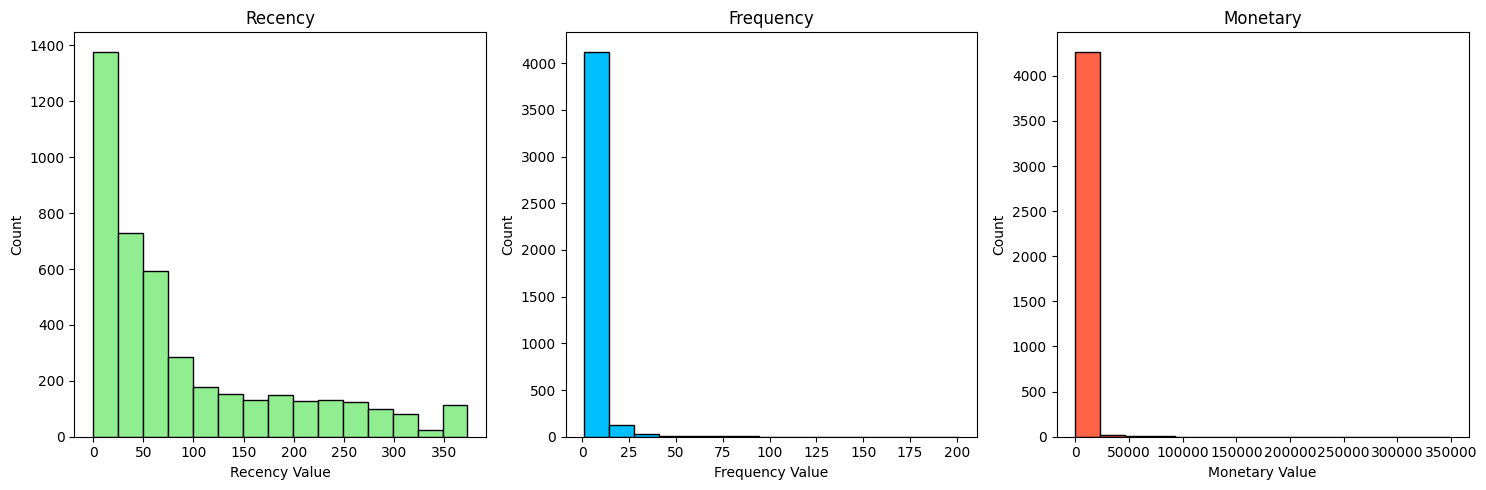

In [ ]:
# buat diagram batang untuk setiap variabel RFM

plt.figure(figsize= (15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_aggregate['Recency'], bins=15, color = 'lightgreen', edgecolor = 'black')
plt.xlabel('Recency Value')
plt.ylabel('Count')
plt.title('Recency')

plt.subplot(1, 3, 2)
plt.hist(df_aggregate['Frequency'], bins=15, color = 'deepskyblue', edgecolor = 'black')
plt.xlabel('Frequency Value')
plt.ylabel('Count')
plt.title('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df_aggregate['Monetary'], bins=15, color = 'tomato', edgecolor = 'black')
plt.xlabel('Monetary Value')
plt.ylabel('Count')
plt.title('Monetary')

plt.tight_layout()
plt.show()

In [ ]:
# Buat plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_aggregate['Recency'], bins=15, color='lightgreen', edgecolor='black')
plt.xlabel('Recency Value')
plt.ylabel('Count')
plt.title('Recency')

plt.subplot(1, 3, 2)
plt.hist(df_aggregate['Frequency'], bins=15, color='deepskyblue', edgecolor='black')
plt.xlabel('Frequency Value')
plt.ylabel('Count')
plt.title('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df_aggregate['Monetary'], bins=15, color='tomato', edgecolor='black')
plt.xlabel('Monetary Value')
plt.ylabel('Count')
plt.title('Monetary')

plt.tight_layout()

# Simpan file dengan latar belakang transparan
filename = 'rfm_histograms.png'
plt.savefig(filename, transparent=True, dpi=300)
plt.close()

# Jika kamu pakai Google Colab
try:
    from google.colab import files
    files.download(filename)
except ImportError:
    print(f"File disimpan di: {os.path.abspath(filename)}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Distribusi dari ketiga variabel RFM (Recency, Frequency, dan Monetary) menunjukkan pola yang tidak merata dan cenderung right-skewed secara signifikan.

Recency: Mayoritas pelanggan melakukan transaksi dalam waktu yang relatif dekat dengan tanggal referensi analisis. Hal ini tercermin dari konsentrasi data pada nilai recency yang rendah. Namun, terdapat sejumlah kecil pelanggan dengan nilai recency yang tinggi, yang mengindikasikan bahwa mereka sudah cukup lama tidak melakukan pembelian.

Frequency: Sebagian besar pelanggan hanya melakukan sedikit transaksi selama periode pengamatan, dengan distribusi yang sangat terpusat di nilai rendah. Terdapat beberapa outlier yang melakukan transaksi dalam jumlah sangat tinggi, kemungkinan berasal dari pelanggan yang sangat loyal atau pembeli dalam skala besar.

Monetary: Nilai transaksi total yang dihasilkan oleh sebagian besar pelanggan relatif kecil, sedangkan hanya segelintir pelanggan yang memberikan kontribusi besar terhadap total pendapatan. Distribusi monetary sangat terdistorsi oleh beberapa pelanggan dengan nilai transaksi yang sangat tinggi, yang dapat mempengaruhi analisis selanjutnya jika tidak dilakukan penyesuaian.

Secara keseluruhan, ketiga fitur menunjukkan distribusi yang tidak normal dan terpengaruh oleh outlier. Oleh karena itu, diperlukan proses transformasi data seperti logarithmic transformation dan feature scaling untuk menyeimbangkan distribusi sebelum dilakukan proses segmentasi pelanggan menggunakan metode clustering.

Selanjutnya akan dicek melalui diagram boxplot

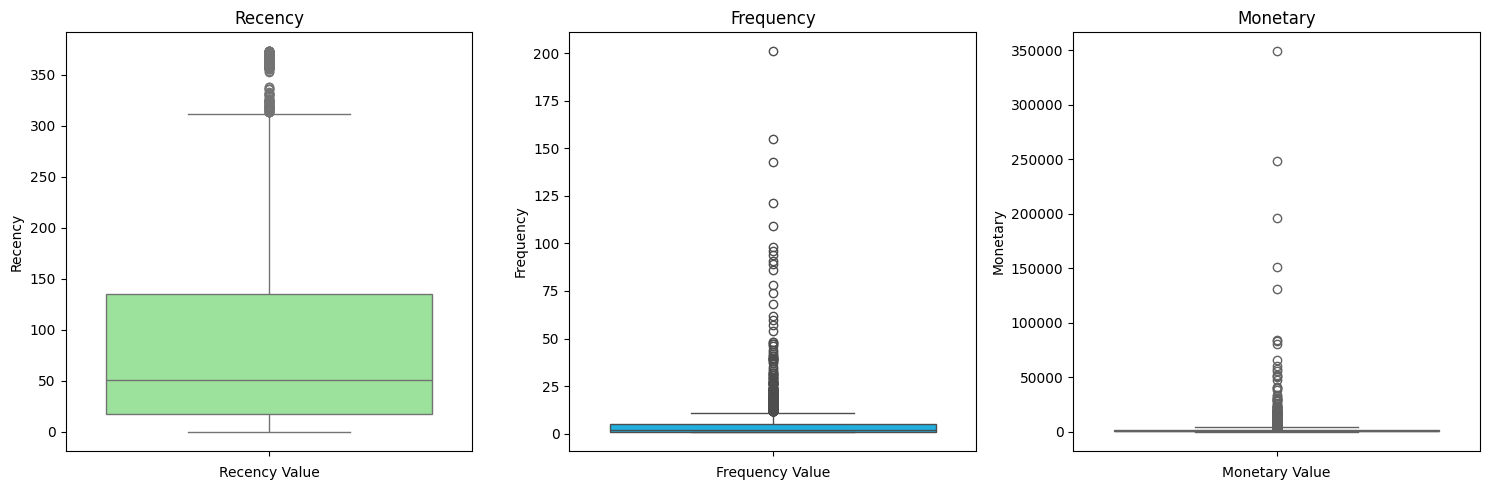

In [ ]:
plt.figure(figsize= (15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = df_aggregate['Recency'], color= 'lightgreen')
plt.xlabel('Recency Value')
plt.title('Recency')

plt.subplot(1, 3, 2)
sns.boxplot(data = df_aggregate['Frequency'], color= 'deepskyblue')
plt.xlabel('Frequency Value')
plt.title('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data = df_aggregate['Monetary'], color= 'tomato')
plt.xlabel('Monetary Value')
plt.title('Monetary')

plt.tight_layout()
plt.show()

In [ ]:
# Buat plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_aggregate['Recency'], color='lightgreen')  # pakai 'y=' agar orientasi vertikal
plt.xlabel('Recency Value')
plt.title('Recency')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_aggregate['Frequency'], color='deepskyblue')
plt.xlabel('Frequency Value')
plt.title('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_aggregate['Monetary'], color='tomato')
plt.xlabel('Monetary Value')
plt.title('Monetary')

plt.tight_layout()

# Simpan dengan transparansi
filename = 'rfm_boxplots.png'
plt.savefig(filename, transparent=True, dpi=300)
plt.close()

# Coba download otomatis jika di Google Colab
try:
    from google.colab import files
    files.download(filename)
except ImportError:
    print(f"File disimpan di: {os.path.abspath(filename)}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Recency

Distribusi nilai recency terlihat cukup lebar dengan median sekitar 50 hari.
Box (kuartil Q1-Q3) berada antara sekitar 20-135 hari, menunjukkan variasi yang cukup besar.
Terdapat beberapa outlier signifikan di bagian atas (sekitar 300-370 hari), yang menandakan sejumlah pelanggan yang tidak berinteraksi untuk waktu yang sangat lama (hampir setahun).
Ini mengindikasikan bahwa sebagian besar pelanggan aktif dalam beberapa bulan terakhir, namun ada segmen yang sangat tidak aktif dan mungkin perlu strategi reengagement.

Frequency

Distribusi frequency sangat condong ke kanan (right-skewed) dengan median yang rendah (sekitar 5).
Sebagian besar pelanggan memiliki frequency rendah (antara 1-10 kali transaksi).
Terdapat banyak outlier di atas, dengan beberapa mencapai 200 transaksi.
Ini menunjukkan bahwa mayoritas pelanggan adalah occasional buyers, sementara ada sekelompok kecil pelanggan yang sangat loyal dengan jumlah transaksi tinggi.
Pelanggan dengan frequency tinggi ini (outlier) sangat berharga dan layak mendapat perhatian khusus.

Monetary

Pola monetary value juga sangat condong ke kanan dengan median yang relatif rendah.
Sebagian besar pelanggan memiliki total belanja yang relatif kecil.
Terdapat banyak outlier dengan nilai transaksi sangat tinggi hingga 350.000.
Ini mengindikasikan adanya perbedaan signifikan dalam nilai belanja antar pelanggan, dengan sebagian kecil pelanggan yang berkontribusi sangat besar terhadap pendapatan.

Kondisi distribusi yang dimiliki oleh Frequency dan Monetary value belum ideal untuk dilakukan clustering menggunakan KMeans karena akan menyebabkan bias. Namun data outliers tidak bisa di-drop begitu saja karena data point tersebut merupakan high-value Customer. Oleh karena itu, akan dilakukan pemisahan data menjadi data non-outliers dan data outliers

In [ ]:
M_Q1 = df_aggregate['Monetary'].quantile(0.25)
M_Q3 = df_aggregate['Monetary'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers = df_aggregate[(df_aggregate['Monetary'] > (M_Q3 + 1.5*M_IQR)) | (df_aggregate['Monetary'] < (M_Q1 - 1.5*M_IQR))].copy()

monetary_outliers.describe()



,Customer ID,Monetary,Frequency,LastInvoice_date,Recency
count,425.000000,425.000000,425.000000,425,425.000000
mean,15059.489412,12372.940861,17.289412,2010-11-08 21:48:41.505882368,30.644706
min,12357.000000,3866.050000,1.000000,2009-12-10 18:03:00,0.000000
25%,13564.000000,4618.410000,8.000000,2010-11-08 10:45:00,3.000000
50%,14936.000000,6286.540000,12.000000,2010-11-26 11:48:00,13.000000
75%,16652.000000,10423.200000,18.000000,2010-12-06 10:03:00,31.000000
max,18260.000000,349164.350000,201.000000,2010-12-09 19:32:00,364.000000
std,1732.440912,26109.963583,20.307042,NaN,52.056060


Bisa terlihat bahwa terdapat 425 data outliers untuk Monetary Values dengan minimum value sebesar 3866 Poundsterling dan maximum value sebesar 349K poundsterling.

Hal yang sama akan dilakukan pada distribusi data Frequency

In [ ]:
M_Q1 = df_aggregate['Frequency'].quantile(0.25)
M_Q3 = df_aggregate['Frequency'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

frequency_outliers = df_aggregate[(df_aggregate['Frequency'] > (M_Q3 + 1.5*M_IQR)) | (df_aggregate['Frequency'] < (M_Q1 - 1.5*M_IQR))].copy()

frequency_outliers.describe()

,Customer ID,Monetary,Frequency,LastInvoice_date,Recency
count,283.000000,283.000000,283.000000,283,283.000000
mean,15311.639576,14453.860057,23.883392,2010-11-23 09:40:51.943462912,16.148410
min,12422.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13741.000000,4342.085500,13.000000,2010-11-19 15:09:00,2.000000
50%,15311.000000,6615.770000,17.000000,2010-12-02 08:52:00,7.000000
75%,16798.000000,11695.695000,23.000000,2010-12-07 10:29:30,20.000000
max,18260.000000,349164.350000,201.000000,2010-12-09 19:32:00,211.000000
std,1769.580015,31592.528811,22.615280,NaN,26.430946


Terdapat 283 record data Frequency yang merupakan outliers, dengan maximum Frequency ada di 201 kali transaksi.

Selanjutnya akan diekstrak data non-outliers,

In [ ]:
df_non_outliers = df_aggregate[(~df_aggregate.index.isin(monetary_outliers.index)) & (~df_aggregate.index.isin(frequency_outliers.index))]

df_non_outliers.describe()

,Customer ID,Monetary,Frequency,LastInvoice_date,Recency
count,3823.000000,3823.000000,3823.000000,3823,3823.000000
mean,15376.810882,894.367930,2.868951,2010-09-03 07:02:22.851163904,97.258959
min,12346.000000,1.550000,1.000000,2009-12-01 09:55:00,0.000000
25%,13915.500000,282.990000,1.000000,2010-07-08 13:04:00,22.000000
50%,15385.000000,591.960000,2.000000,2010-10-12 14:14:00,58.000000
75%,16855.000000,1276.235000,4.000000,2010-11-17 13:19:30,154.000000
max,18287.000000,3862.190000,11.000000,2010-12-09 20:01:00,373.000000
std,1691.646742,828.772397,2.243623,NaN,98.207247


Mari kita lihat distribusi data non-outliers kita melalui diagram boxplot

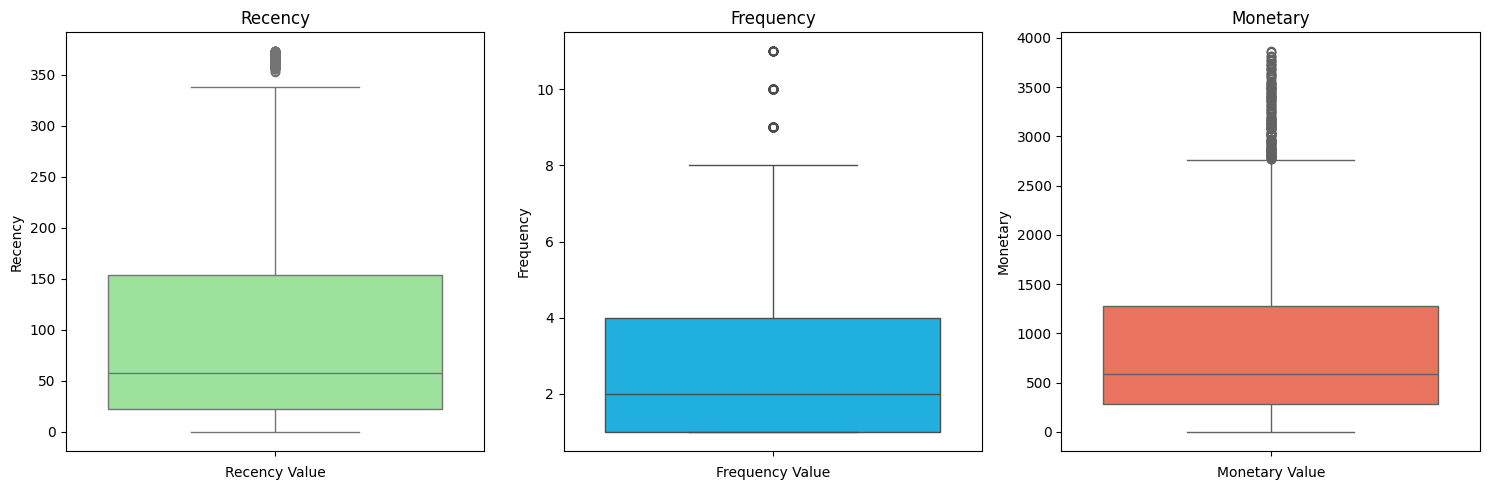

In [ ]:
plt.figure(figsize= (15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = df_non_outliers['Recency'], color= 'lightgreen')
plt.xlabel('Recency Value')
plt.title('Recency')

plt.subplot(1, 3, 2)
sns.boxplot(data = df_non_outliers['Frequency'], color= 'deepskyblue')
plt.xlabel('Frequency Value')
plt.title('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data = df_non_outliers['Monetary'], color= 'tomato')
plt.xlabel('Monetary Value')
plt.title('Monetary')

plt.tight_layout()
plt.show()

In [ ]:
# Buat plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_non_outliers['Recency'], color='lightgreen')
plt.xlabel('Recency Value')
plt.title('Recency')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_non_outliers['Frequency'], color='deepskyblue')
plt.xlabel('Frequency Value')
plt.title('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_non_outliers['Monetary'], color='tomato')
plt.xlabel('Monetary Value')
plt.title('Monetary')

plt.tight_layout()

# Simpan secara transparan
filename = 'rfm_boxplots_no_outliers.png'
plt.savefig(filename, transparent=True, dpi=300)
plt.close()

# Download jika di Google Colab
try:
    from google.colab import files
    files.download(filename)
except ImportError:
    print(f"File disimpan di: {os.path.abspath(filename)}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Terlihat bahwa data Frequency dan Monetary menjadi lebih normal. Walaupun masih terdapat beberapa outliers, hal ini masih tolerable untuk kemudian dilakukan clustering. Selanjutnya akan dilakukan clustering menggunakan KMeans Clusterinh.

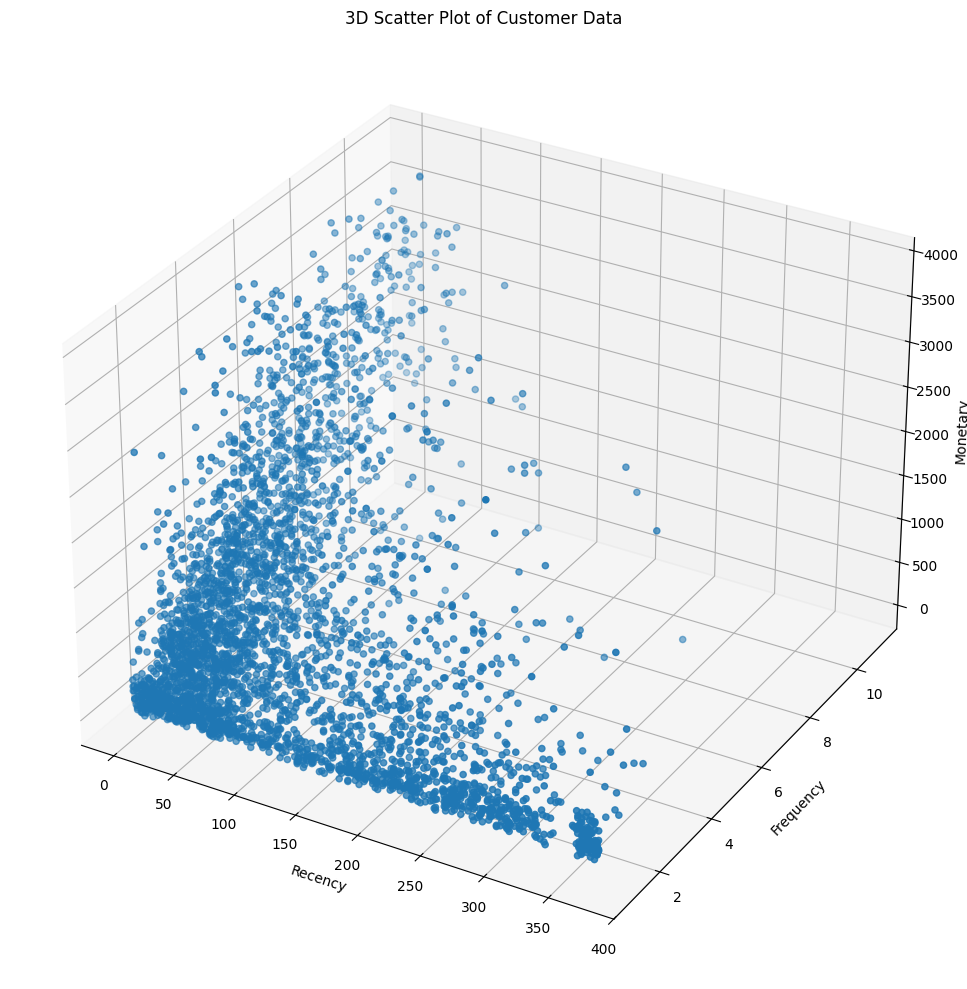

In [ ]:
# 3D Plot dari data point non-outliers

fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(df_non_outliers['Recency'], df_non_outliers['Frequency'], df_non_outliers['Monetary'])

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.set_title('3D Scatter Plot of Customer Data')

plt.tight_layout()
plt.show()

In [ ]:
# Buat figure dan plot 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    df_non_outliers['Recency'],
    df_non_outliers['Frequency'],
    df_non_outliers['Monetary'],
    c='steelblue', alpha=0.8
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot of Customer Data')

plt.tight_layout()

# Simpan secara transparan
filename = 'rfm_3d_scatter.png'
plt.savefig(filename, transparent=True, dpi=300)
plt.close()

# Download jika di Google Colab
try:
    from google.colab import files
    files.download(filename)
except ImportError:
    print(f"File disimpan di: {os.path.abspath(filename)}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Terlihat bahwa setiap fitur memiliki rentang/skala yang berbeda, ini akan menyebabkan bias pada algoritma KMeans. Untuk itu mari kita melakukan scalling menggunakan Standardized Scaler.

In [ ]:
scaler = StandardScaler()

data_scaled = scaler.fit_transform(df_non_outliers[["Recency", "Frequency", "Monetary"]])

data_scaled

array([[ 0.67968275, -0.38734891, -0.87491183],
       [-0.9701058 , -0.38734891,  0.51764294],
       [-0.24705032, -0.83311499, -0.81119481],
       ...,
       [ 2.01377102, -0.83311499, -0.56400173],
       [ 0.13993711, -0.38734891,  0.48519312],
       [-0.8173476 ,  0.50418324,  1.75142407]])

In [ ]:
df_scaled = pd.DataFrame(data_scaled, index = df_non_outliers.index, columns = ["Recency", "Frequency", "Monetary"])
df_scaled

,Recency,Frequency,Monetary
0,0.679683,-0.387349,-0.874912
1,-0.970106,-0.387349,0.517643
2,-0.247050,-0.833115,-0.811195
3,-0.562751,0.058417,2.144141
4,-0.888635,-0.833115,-0.716138
...,...,...,...
4297,-0.817348,1.395715,-0.304826
4298,-0.318337,-0.833115,-0.522151
4299,2.013771,-0.833115,-0.564002
4300,0.139937,-0.387349,0.485193


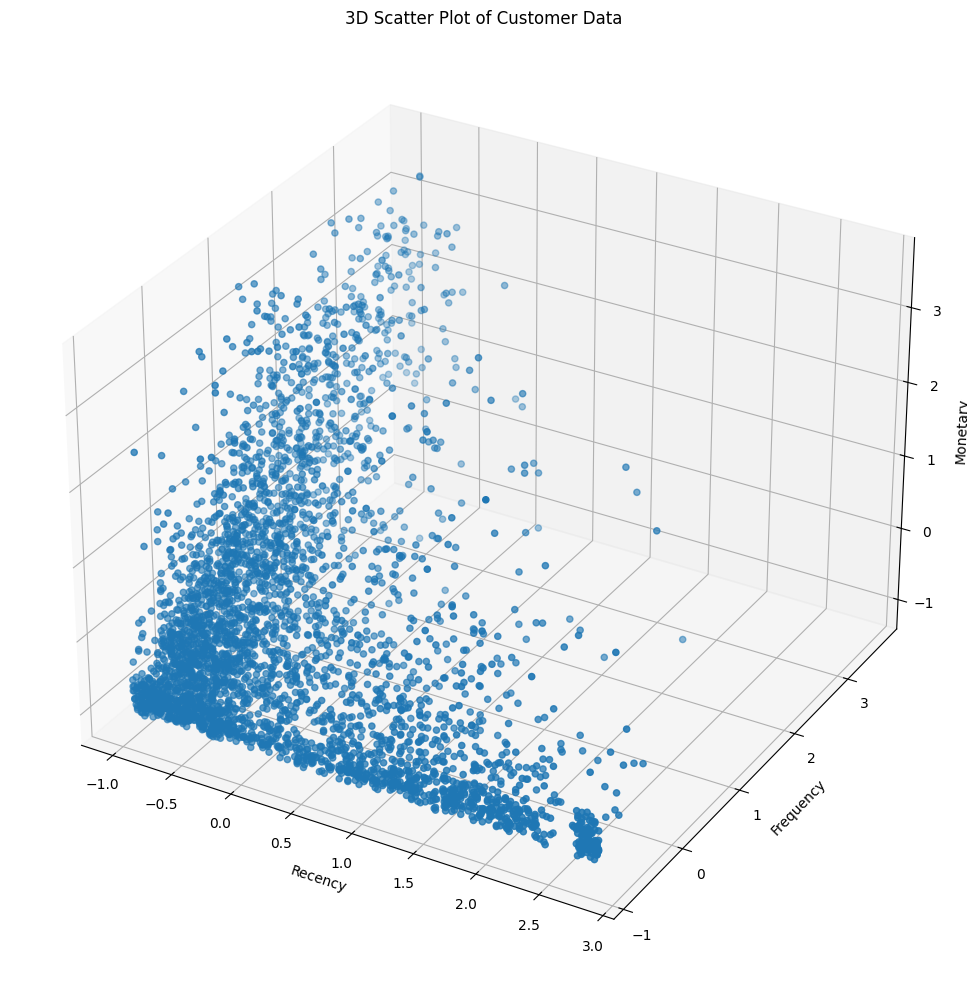

In [ ]:
# 3D Plot dari data point non-outliers and Scaled

fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(df_scaled['Recency'], df_scaled['Frequency'], df_scaled['Monetary'])

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.set_title('3D Scatter Plot of Customer Data')

plt.tight_layout()
plt.show()

In [ ]:
# Buat figure dan scatter plot 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    df_scaled['Recency'],
    df_scaled['Frequency'],
    df_scaled['Monetary'],
    c='mediumpurple',  alpha=0.8
)

ax.set_xlabel('Recency (Scaled)')
ax.set_ylabel('Frequency (Scaled)')
ax.set_zlabel('Monetary (Scaled)')
ax.set_title('3D Scatter Plot of Scaled Customer Data')

plt.tight_layout()

# Simpan file dengan latar transparan
filename = 'rfm_3d_scatter_scaled.png'
plt.savefig(filename, transparent=True, dpi=300)
plt.close()

# Download otomatis jika di Google Colab
try:
    from google.colab import files
    files.download(filename)
except ImportError:
    print(f"File disimpan di: {os.path.abspath(filename)}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sekarang skala/rentang data menjadi -1 hingga 3 untuk semua fitur. Sekarang data telah siap untuk dilakukan clustering.

# KMeans Clustering

## Non-outliers data

Mari tentukan jumlah cluster terlebih dahulu dengan mengecek menggunakan elbow method dan silhoutte score.

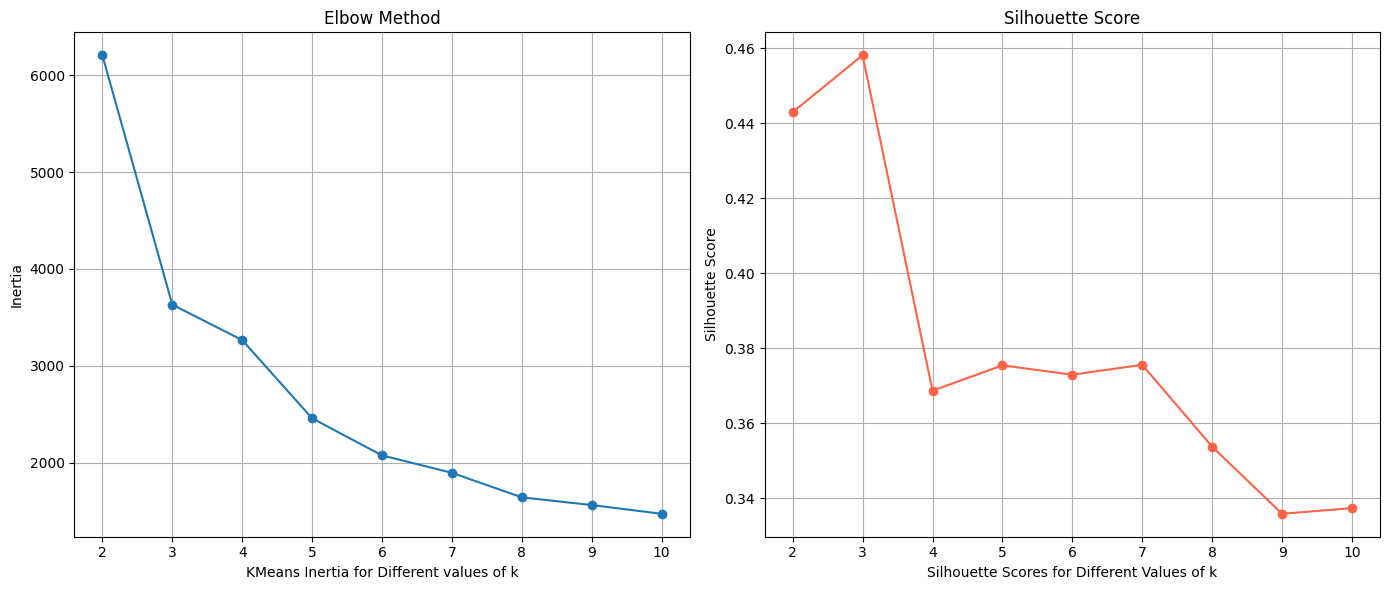

In [ ]:
max_k = 10
inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

  kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
  cluster_labels = kmeans.fit_predict(df_scaled)

  sil_score = silhouette_score(df_scaled, cluster_labels)
  silhouette_scores.append(sil_score)

  inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('KMeans Inertia for Different values of k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o', color='tomato')
plt.xlabel('Silhouette Scores for Different Values of k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Buat plot elbow dan silhouette
plt.figure(figsize=(14, 6))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_values)
plt.grid(True)

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='tomato')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()

# Simpan file transparan
filename = 'kmeans_elbow_silhouette.png'
plt.savefig(filename, transparent=True, dpi=300)
plt.close()

# Download otomatis jika di Google Colab
try:
    from google.colab import files
    files.download(filename)
except ImportError:
    print(f"File disimpan di: {os.path.abspath(filename)}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Terlihat bahwa elbow dari curve Inertia ialah antara pada value k=3, 4, atau 5. Namun setelah mengecek nilai silhouette scores pada ketiga value k tersebut, dapat dipastikan bahwa value k terbaik ialah k=3, karena memiliki silhouette tertinggi diantara kandidat elbow kita. Maka dari itu, selanjutnya, data df_scaled akan diclustering menggunakan KMeans Clustering dengan k=3.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(df_scaled)

cluster_labels

array([2, 1, 1, ..., 0, 1, 3], dtype=int32)

In [ ]:
df_non_outliers["Cluster"] = cluster_labels

df_non_outliers

,Customer ID,Monetary,Frequency,LastInvoice_date,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,2
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,1
2,12348.0,222.16,1,2010-09-27 14:59:00,73,1
3,12349.0,2671.14,3,2010-10-28 08:23:00,42,3
4,12351.0,300.93,1,2010-11-29 15:23:00,10,1
...,...,...,...,...,...,...
4297,18283.0,641.77,6,2010-11-22 15:30:00,17,1
4298,18284.0,461.68,1,2010-10-04 11:33:00,66,1
4299,18285.0,427.00,1,2010-02-17 10:24:00,295,0
4300,18286.0,1296.43,2,2010-08-20 11:57:00,111,1


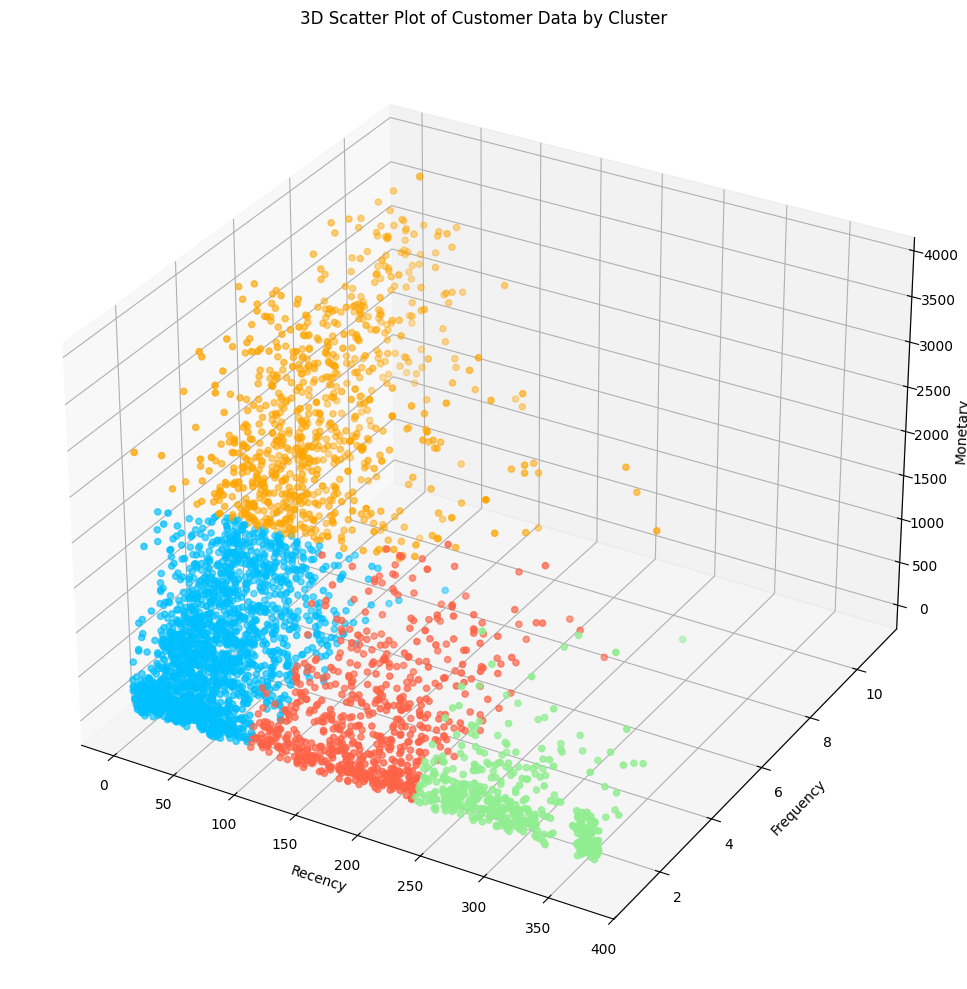

In [ ]:
# Mapping hasil cluster pada scatter plot

cluster_colors = {
    0: 'lightgreen',
    1: 'deepskyblue',
    2: 'tomato',
    3: 'orange'
}

colors = df_non_outliers['Cluster'].map(cluster_colors)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(df_non_outliers['Recency'], df_non_outliers['Frequency'], df_non_outliers['Monetary'], c=colors, marker='o')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.tight_layout()
plt.show()

In [ ]:
# Warna untuk setiap cluster
cluster_colors = {
    0: 'lightgreen',
    1: 'deepskyblue',
    2: 'tomato',
    3: 'orange'
}

# Mapping warna berdasarkan label cluster
colors = df_non_outliers['Cluster'].map(cluster_colors)

# Buat 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    df_non_outliers['Recency'],
    df_non_outliers['Frequency'],
    df_non_outliers['Monetary'],
    c=colors,
    marker='o',
    alpha=0.9
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.tight_layout()

# Simpan dengan latar transparan
filename = 'rfm_3d_clusters.png'
plt.savefig(filename, transparent=True, dpi=300)
plt.close()

# Download otomatis jika di Google Colab
try:
    from google.colab import files
    files.download(filename)
except ImportError:
    print(f"File disimpan di: {os.path.abspath(filename)}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

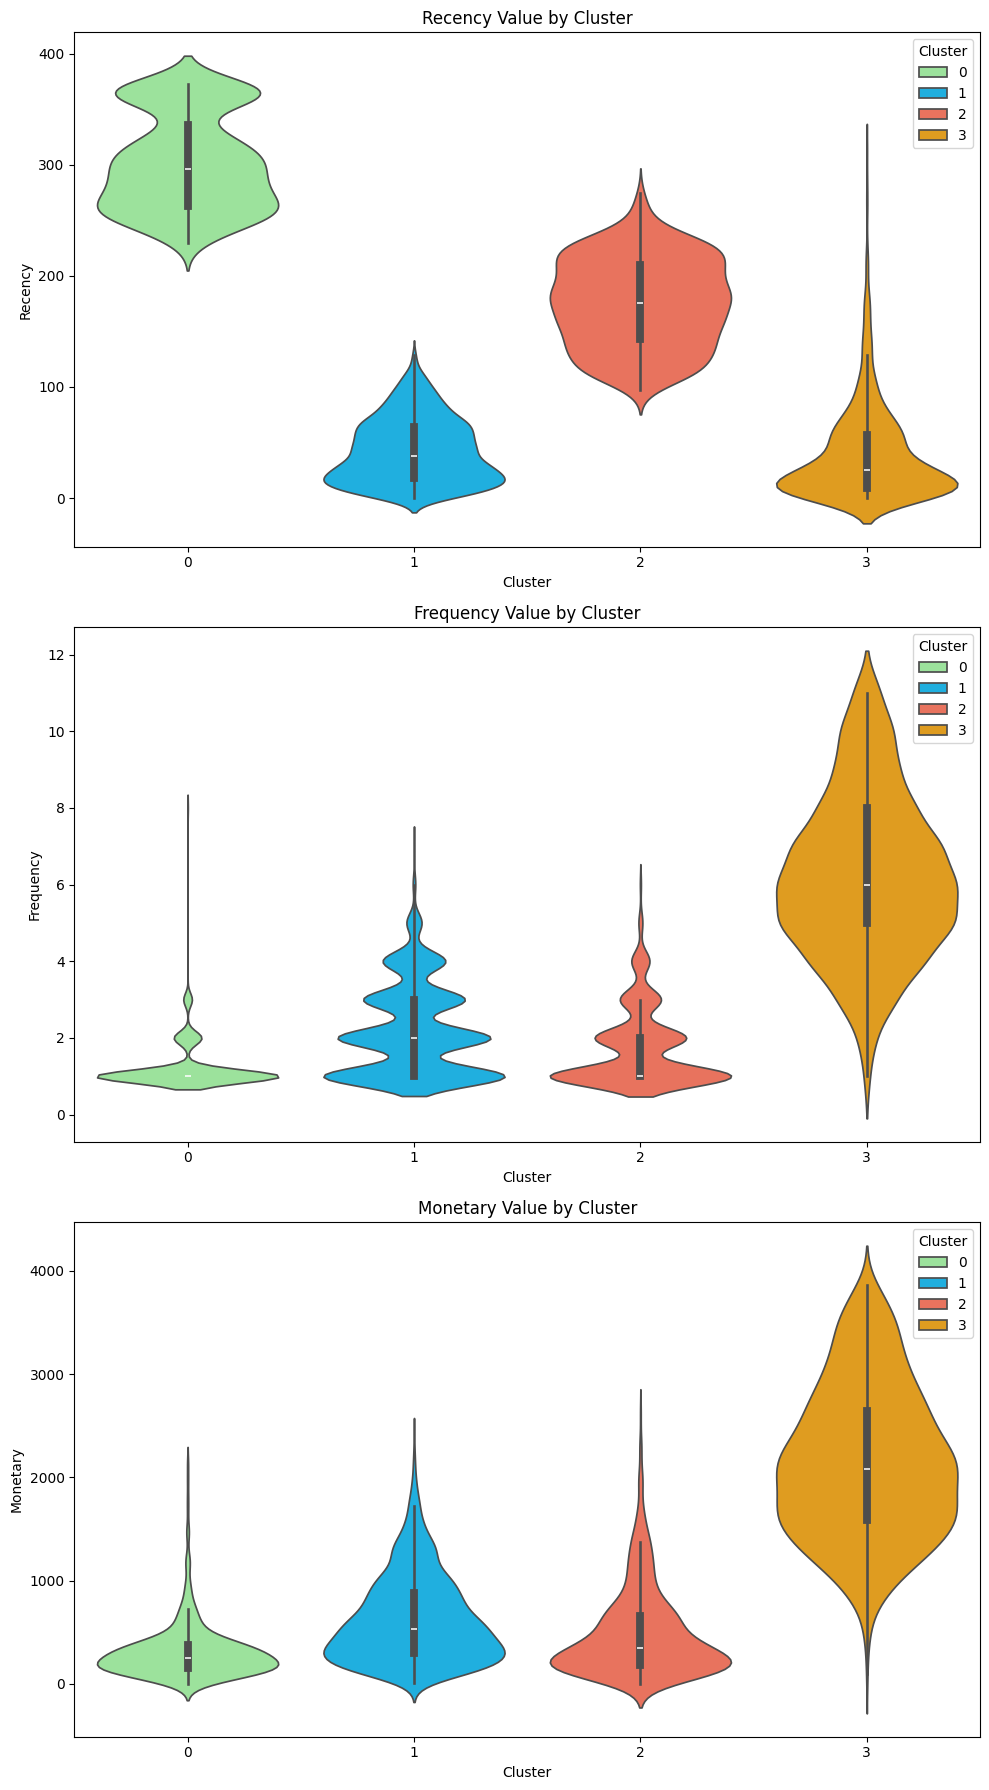

In [ ]:
plt.figure(figsize= (10, 18))

plt.subplot(3,1,1)
sns.violinplot(data = df_non_outliers, x = 'Cluster', y = df_non_outliers['Recency'], palette = cluster_colors, hue=df_non_outliers['Cluster'])
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.title('Recency Value by Cluster')

plt.subplot(3,1,2)
sns.violinplot(data = df_non_outliers, x = 'Cluster', y = df_non_outliers['Frequency'], palette = cluster_colors, hue=df_non_outliers['Cluster'])
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency Value by Cluster')

plt.subplot(3,1,3)
sns.violinplot(data = df_non_outliers, x = 'Cluster', y = df_non_outliers['Monetary'], palette = cluster_colors, hue=df_non_outliers['Cluster'])
plt.xlabel('Cluster')
plt.ylabel('Monetary')
plt.title('Monetary Value by Cluster')

plt.tight_layout()
plt.show()

In [ ]:
# Buat figure
plt.figure(figsize=(10, 18))

# Recency
plt.subplot(3, 1, 1)
sns.violinplot(
    data=df_non_outliers,
    x='Cluster',
    y='Recency',
    palette=cluster_colors,
    hue='Cluster',
    dodge=False
)
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.title('Recency Value by Cluster')

# Frequency
plt.subplot(3, 1, 2)
sns.violinplot(
    data=df_non_outliers,
    x='Cluster',
    y='Frequency',
    palette=cluster_colors,
    hue='Cluster',
    dodge=False
)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency Value by Cluster')

# Monetary
plt.subplot(3, 1, 3)
sns.violinplot(
    data=df_non_outliers,
    x='Cluster',
    y='Monetary',
    palette=cluster_colors,
    hue='Cluster',
    dodge=False
)
plt.xlabel('Cluster')
plt.ylabel('Monetary')
plt.title('Monetary Value by Cluster')

plt.tight_layout()

# Simpan sebagai file transparan
filename = 'rfm_violin_by_cluster.png'
plt.savefig(filename, transparent=True, dpi=300)
plt.close()

# Download otomatis jika di Google Colab
try:
    from google.colab import files
    files.download(filename)
except ImportError:
    print(f"File disimpan di: {os.path.abspath(filename)}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Outliers Data Analysis

Pada feature engineering, kita telah mendapatkan dataframe untuk data outliers untuk 2 fitur yaitu frequency dan monetary. Keduanya ini tidak saling bebas, alias terdapat data point yang overlapping satu sama lain. Oleh karena itu perlu dilakukan beberapa langkah pemisahan data overlapping.

In [ ]:
overlap_data = monetary_outliers.index.intersection(frequency_outliers.index)

overlap_data

Index([  55,   62,   66,   85,   86,   87,   89,   93,  127,  146,
       ...
       4124, 4142, 4160, 4173, 4217, 4252, 4253, 4254, 4258, 4279],
      dtype='int64', length=229)

In [ ]:
monetary_only_outliers = monetary_outliers.drop(overlap_data)
frequency_only_outliers = frequency_outliers.drop(overlap_data)

monetary_and_freq_outliers = monetary_outliers.loc[overlap_data]

Pada tahap diatas, kita telah memisahkan data outliers menjadi beberapa bagian yaitu:
- Monetary Outliers (Only)
- Frequency Outliers (Only)
- Monetary and Frequenxy Outliers

Secara tidak langsung, kita telah mendapatkan segmentasi dari data outliers, dan selanjutnya kita bisa langsung menganalisanya.

In [ ]:
# beri label untuk setiap segment
monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_freq_outliers["Cluster"] = -3

df_ouliers_cluster = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_freq_outliers])

df_ouliers_cluster

,Customer ID,Monetary,Frequency,LastInvoice_date,Recency,Cluster
9,12357.0,12079.99,2,2010-11-16 14:29:00,23,-1
26,12380.0,6951.49,7,2010-08-31 14:54:00,100,-1
43,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
49,12415.0,19543.84,7,2010-11-29 15:07:00,10,-1
63,12433.0,7205.39,5,2010-12-08 16:49:00,1,-1
...,...,...,...,...,...,...
4252,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4253,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4254,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4258,18231.0,4797.70,23,2010-10-29 14:17:00,41,-3


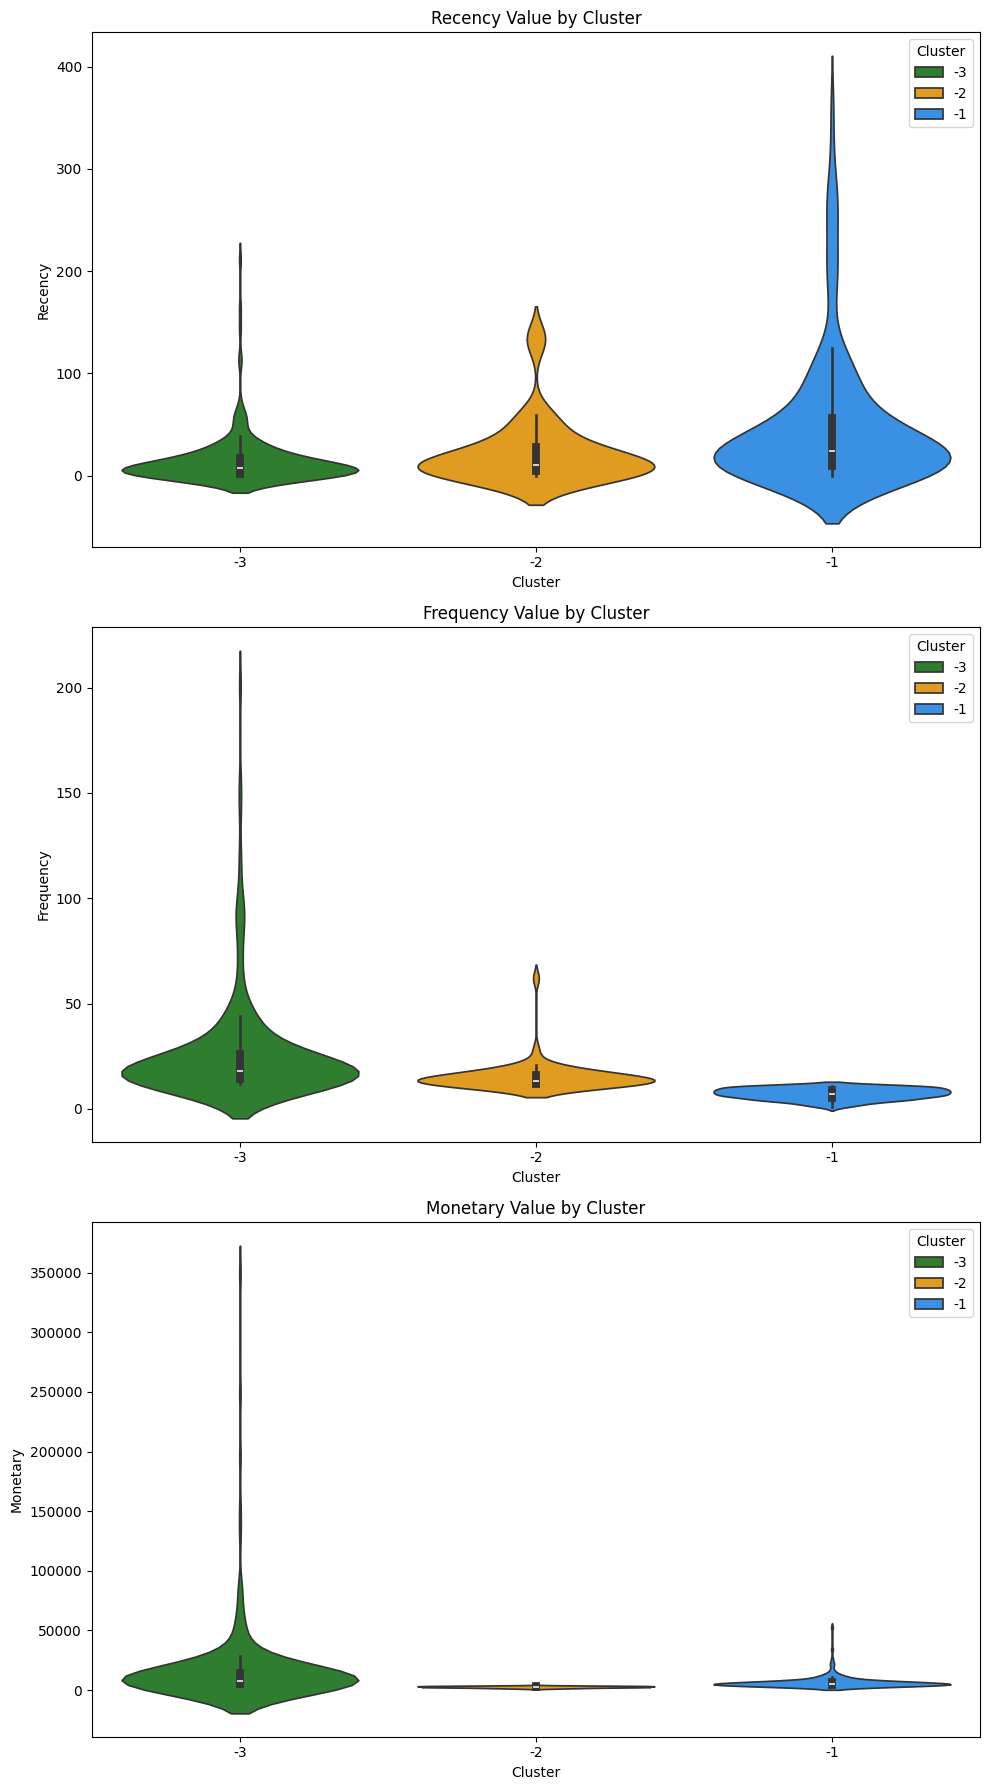

In [ ]:
cluster_colors_outliers = {
    -1: 'dodgerblue',
    -2: 'orange',
    -3: 'forestgreen'
}

plt.figure(figsize= (10, 18))

plt.subplot(3,1,1)
sns.violinplot(data = df_ouliers_cluster, x = 'Cluster', y = df_ouliers_cluster['Recency'], palette = cluster_colors_outliers, hue=df_ouliers_cluster['Cluster'])
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.title('Recency Value by Cluster')

plt.subplot(3,1,2)
sns.violinplot(data = df_ouliers_cluster, x = 'Cluster', y = df_ouliers_cluster['Frequency'], palette = cluster_colors_outliers, hue=df_ouliers_cluster['Cluster'])
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency Value by Cluster')

plt.subplot(3,1,3)
sns.violinplot(data = df_ouliers_cluster, x = 'Cluster', y = df_ouliers_cluster['Monetary'], palette = cluster_colors_outliers, hue=df_ouliers_cluster['Cluster'])
plt.xlabel('Cluster')
plt.ylabel('Monetary')
plt.title('Monetary Value by Cluster')

plt.tight_layout()
plt.show()

In [ ]:
# Buat figure
plt.figure(figsize=(10, 18))

# Recency
plt.subplot(3, 1, 1)
sns.violinplot(
    data=df_ouliers_cluster,
    x='Cluster',
    y='Recency',
    palette=cluster_colors_outliers,
    hue='Cluster',
    dodge=False
)
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.title('Recency Value by Cluster')

# Frequency
plt.subplot(3, 1, 2)
sns.violinplot(
    data=df_ouliers_cluster,
    x='Cluster',
    y='Frequency',
    palette=cluster_colors_outliers,
    hue='Cluster',
    dodge=False
)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency Value by Cluster')

# Monetary
plt.subplot(3, 1, 3)
sns.violinplot(
    data=df_ouliers_cluster,
    x='Cluster',
    y='Monetary',
    palette=cluster_colors_outliers,
    hue='Cluster',
    dodge=False
)
plt.xlabel('Cluster')
plt.ylabel('Monetary')
plt.title('Monetary Value by Cluster')

plt.tight_layout()

# Simpan file transparan
filename = 'rfm_violin_with_outliers.png'
plt.savefig(filename, transparent=True, dpi=300)
plt.close()

# Download otomatis jika di Google Colab
try:
    from google.colab import files
    files.download(filename)
except ImportError:
    print(f"File disimpan di: {os.path.abspath(filename)}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>